In [1]:
'''
Resampling strategies for imbalanced datasets
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://www.kaggle.com/bharath901/amexpert-2019/data#
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import csv

In [2]:
'''
Defining a Class to import the Data into a pandas DataFrame for analysis
- Method to storing the Data into a DataFrame
- Method to extracting Information of the Data to understand datatype associated with each column
- Method to describing the Data
- Method to understanding Null values distribution
- Method to understanding Unique values distribution
'''

class import_data():
    
    '''
    Method to extract and store the data as pandas dataframe
    '''
    def __init__(self,path):
        self.raw_data = pd.read_csv(path)
        display (self.raw_data.head(10))
        

    '''
    Method to extract information about the data and display
    '''
    def get_info(self):
        display (self.raw_data.info())
        
    '''
    Method to describe the data
    '''
    def get_describe(self):
        display (self.raw_data.describe())
        
    '''
    Mehtod to understand Null values distribution
    '''
    def null_value(self):
        col_null = pd.DataFrame(self.raw_data.isnull().sum()).reset_index()
        col_null.columns = ['DataColumns','NullCount']
        col_null['NullCount_Pct'] = round((col_null['NullCount']/self.raw_data.shape[0])*100,2)
        display (col_null)
        
    '''
    Method to understand Unique values distribution
    '''
    def unique_value(self):
        col_uniq = pd.DataFrame(self.raw_data.nunique()).reset_index()
        col_uniq.columns = ['DataColumns','UniqCount']
        col_uniq_cnt = pd.DataFrame(self.raw_data.count(axis=0)).reset_index()
        col_uniq_cnt.columns = ['DataColumns','UniqCount']
        col_uniq['UniqCount_Pct'] = round((col_uniq['UniqCount']/col_uniq_cnt['UniqCount'])*100,2)
        display (col_uniq)
    '''
    Method to return the dataset as dataframe
    '''
    def return_data(self):
        base_loan_data = self.raw_data
        return (base_loan_data)
    

'''
Evaluation and Analysis starts here for train.csv
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/train.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
train_data = data.return_data()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


In [3]:
'''
Evaluation and Analysis starts here for Campaign Data
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/campaign_data.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
campaign_data = data.return_data()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [4]:
'''
Evaluation and Analysis starts here for Coupon Data
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/coupon_item_mapping.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
coupon_data = data.return_data()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
5,520,77
6,529,77
7,524,77
8,522,81
9,518,81


In [5]:
'''
Evaluation and Analysis starts here for Customer Demographic
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/customer_demographics.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
cust_demo_data = data.return_data()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [6]:
'''
Evaluation and Analysis starts here for Customer Transaction
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/customer_transaction_data.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
cust_tran_data = data.return_data()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
5,2012-01-02,1501,57397,1,71.24,-28.14,0.0
6,2012-01-02,857,12424,1,106.50,-14.25,0.0
7,2012-01-02,857,14930,1,110.07,0.00,0.0
8,2012-01-02,857,16657,1,89.05,-35.26,0.0
9,2012-01-02,67,10537,3,32.06,0.00,0.0


In [7]:
'''
Evaluation and Analysis starts here for Item Data
'''
#path = str(input('Enter the path to load the dataset:'))
path = '/Users/pritigirishvankudre/Day7_BasicML/Amex/item_data.csv'
print ('='*100)
data = import_data(path)
#data.get_info()
#data.null_value()
#data.unique_value()
#data.get_describe()
item_data = data.return_data()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
5,6,56,Local,Grocery
6,7,56,Local,Pharmaceutical
7,8,56,Local,Bakery
8,9,11,Local,Grocery
9,10,56,Local,Grocery


In [8]:
train_data['redemption_status'].value_counts()[0]/len(train_data)

0.9906978524671746

Data seems imbalance hence need to be balanced basis resampling techniques.

In [9]:
def date_q(date):
    """
    Convert Date to Quarter when separated with /
    """
    qdate = date.strip().split('/')[1:]
    qdate1 = qdate[0]

    if qdate1 in ['01','02','03']:
        return (str('Q1' + '-' + qdate[1]))
    if qdate1 in ['04','05','06']:
        return (str('Q2' + '-' + qdate[1]))
    if qdate1 in ['07','08','09']:
        return (str('Q3' + '-' + qdate[1]))
    if qdate1 in ['10','11','12']:
        return (str('Q4' + '-' + qdate[1]))

In [10]:
def date_q1(date):
    """
    Calculates Age in years from DOB and Disbursal Date
    """
    qdate = date.strip().split('-')[0:2]
    qdate1 = qdate[1]
    qdate2 = str(qdate[0])
    if qdate1 in ['01','02','03']:
        return (str('Q1' + '-' + qdate2[2:]))
    if qdate1 in ['04','05','06']:
        return (str('Q2' + '-' + qdate2[2:]))
    if qdate1 in ['07','08','09']:
        return (str('Q3' + '-' + qdate2[2:]))
    if qdate1 in ['10','11','12']:
        return (str('Q4' + '-' + qdate2[2:]))

# EDA for merged file

In [11]:
campaign_data_DATE = campaign_data.copy()
campaign_data_DATE.head()

campaign_data_DATE['start_date_q'] = campaign_data_DATE['start_date'].map(lambda x: date_q(x))
campaign_data_DATE['end_date_q'] = campaign_data_DATE['end_date'].map(lambda x: date_q(x))
campaign_data_DATE.head()

campaign_data_DATE.drop(['start_date','end_date'],axis=1,inplace=True)

cust_tran_data_4 = cust_tran_data.copy()
cust_tran_data_4 = pd.merge(cust_tran_data_4,coupon_data,how='inner',on='item_id')
cust_tran_data_4['tran_date_q'] = cust_tran_data_4['date'].map(lambda x: date_q1(x))
cust_tran_data_4.drop('date',axis=1,inplace=True)

cust_tran_data_4['tot_quantity'] = pd.DataFrame(cust_tran_data_4.groupby(['customer_id','item_id','coupon_id','tran_date_q'])['quantity'].transform('sum'))
cust_tran_data_4['tot_coupon_disc'] = pd.DataFrame(cust_tran_data_4.groupby(['customer_id','item_id','coupon_id','tran_date_q'])['coupon_discount'].transform('sum'))
cust_tran_data_4['tot_other_disc'] = pd.DataFrame(cust_tran_data_4.groupby(['customer_id','item_id','coupon_id','tran_date_q'])['other_discount'].transform('sum'))
cust_tran_data_4['tot_sell_price'] = pd.DataFrame(cust_tran_data_4.groupby(['customer_id','item_id','coupon_id','tran_date_q'])['selling_price'].transform('sum'))
cust_tran_data_4.drop(['quantity','coupon_discount','other_discount','selling_price'],axis=1,inplace=True)
cust_tran_data_4.drop_duplicates(subset=['customer_id','item_id','coupon_id','tran_date_q'], keep='first', inplace=True)
train_data_merge_DATE = pd.merge(train_data,cust_tran_data_4,how='inner',on=['customer_id','coupon_id'])
train_data_merge_DATE = pd.merge(train_data_merge_DATE,cust_demo_data,how='left',on='customer_id')
train_data_merge_DATE = pd.merge(train_data_merge_DATE,item_data,how='left',on='item_id')
train_data_merge_DATE = pd.merge(train_data_merge_DATE,campaign_data_DATE,how='left',on='campaign_id')

train_data_merge_EDA = train_data_merge_DATE.copy()
train_data_merge_EDA['no_of_children'].fillna('Unspecified',inplace=True)
train_data_merge_EDA['marital_status'].fillna('Unspecified',inplace=True)
train_data_merge_EDA['rented'].fillna('Unspecified',inplace=True)
train_data_merge_EDA['family_size'].fillna('Unspecified',inplace=True)
train_data_merge_EDA['age_range'].fillna('Unspecified',inplace=True)
train_data_merge_EDA['income_bracket'].fillna('Unspecified',inplace=True)

In [12]:
train_data_merge_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103300 entries, 0 to 103299
Data columns (total 23 columns):
id                   103300 non-null int64
campaign_id          103300 non-null int64
coupon_id            103300 non-null int64
customer_id          103300 non-null int64
redemption_status    103300 non-null int64
item_id              103300 non-null int64
tran_date_q          103300 non-null object
tot_quantity         103300 non-null int64
tot_coupon_disc      103300 non-null float64
tot_other_disc       103300 non-null float64
tot_sell_price       103300 non-null float64
age_range            103300 non-null object
marital_status       103300 non-null object
rented               103300 non-null object
family_size          103300 non-null object
no_of_children       103300 non-null object
income_bracket       103300 non-null object
brand                103300 non-null int64
brand_type           103300 non-null object
category             103300 non-null object
campaign_type 

In [13]:
train_data_merge_EDA.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,tot_quantity,tot_coupon_disc,tot_other_disc,tot_sell_price,brand
count,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000,103300.000000
mean,62683.695915,11.987648,267.802749,821.186428,0.117212,29371.794056,1.807270,-1.677993,-30.107511,145.632721,895.058964
std,37068.569885,5.338346,347.361202,469.385678,0.321674,18041.054620,2.430473,11.176287,68.290769,207.333467,1079.677889
min,15.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,-534.300000,-6267.670000,1.070000,1.000000
25%,30196.500000,8.000000,21.000000,427.000000,0.000000,14215.000000,1.000000,0.000000,-35.620000,62.690000,89.000000
50%,63541.000000,13.000000,23.000000,820.000000,0.000000,26099.000000,1.000000,0.000000,-11.040000,99.020000,676.000000
75%,94856.000000,13.000000,578.000000,1233.250000,0.000000,40934.500000,2.000000,0.000000,0.000000,163.140000,1149.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000,74054.000000,165.000000,0.000000,0.000000,11028.170000,5468.000000


In [14]:
col_uniq = pd.DataFrame(train_data_merge_EDA.nunique()).reset_index()
col_uniq.columns = ['DataColumns','UniqCount']
col_uniq_cnt = pd.DataFrame(train_data_merge_EDA.count(axis=0)).reset_index()
col_uniq_cnt.columns = ['DataColumns','UniqCount']
col_uniq['UniqCount_Pct'] = round((col_uniq['UniqCount']/col_uniq_cnt['UniqCount'])*100,2)
display (col_uniq)

,DataColumns,UniqCount,UniqCount_Pct
0,id,13880,13.44
1,campaign_id,18,0.02
2,coupon_id,755,0.73
3,customer_id,1371,1.33
4,redemption_status,2,0.00
5,item_id,14052,13.60
6,tran_date_q,7,0.01
7,tot_quantity,68,0.07
8,tot_coupon_disc,129,0.12
9,tot_other_disc,2295,2.22


# Lets have a look for Customer Id's in terms of using coupons most and least number of times.

In [15]:
'''
Customer ids using coupons at least once with their demographic details
'''

a = pd.DataFrame(train_data_merge_EDA[(train_data_merge_EDA['redemption_status']==1)])
b = pd.DataFrame(a.groupby('customer_id')['redemption_status'].sum()).reset_index()
b.columns = ['customer_id','redeem_count']
b.sort_values(by='redeem_count',ascending=False,inplace=True)
print ('Top 5 Customers reediming coupons')
display (b.head())

Top 5 Customers reediming coupons


,customer_id,redeem_count
96,626,618
244,1574,462
180,1210,421
36,235,340
234,1534,327


In [16]:
c = pd.DataFrame(train_data_merge_EDA[(train_data_merge_EDA['customer_id']==626)|(train_data_merge_EDA['customer_id']==1574)|(train_data_merge_EDA['customer_id']==1210)|(train_data_merge_EDA['customer_id']==235)|(train_data_merge_EDA['customer_id']==1534)][['customer_id','age_range','marital_status','rented','family_size','no_of_children','income_bracket']])
c.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)
display (c)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
1742,626,36-45,Single,0,2,1,4
4478,1574,36-45,Married,0,2,Unspecified,5
9456,1210,46-55,Married,0,2,Unspecified,5
13227,235,56-70,Married,0,2,Unspecified,5
21310,1534,36-45,Married,0,3,1,5


Hypothesis to test:

1. Is age_range of 36 to 55 is mostly using coupons???

2. Is Marital Status as Married are to redeem coupon???

3. Is couple (family size of 2) are using coupons mostly???

4. Is people not on rent are mostly using coupons???

5. Is no_of_children irrelevant to redeem coupon???

6. Is income bracket of 5 are using coupons mostly???

In [17]:
'''
1. Is age_range of 36 to 55 is mostly using coupons???
'''
d = pd.DataFrame(train_data_merge_EDA.groupby(['age_range'])['redemption_status'].sum()).reset_index()
d.columns = ['age_range','tot_redeem']
d['percent'] = round(d['tot_redeem']/(d['tot_redeem'].sum())*100,2)
display (d)

,age_range,tot_redeem,percent
0,18-25,171,1.41
1,26-35,1735,14.33
2,36-45,3796,31.35
3,46-55,3388,27.98
4,56-70,661,5.46
5,70+,531,4.39
6,Unspecified,1826,15.08


<IPython.core.display.Javascript object>


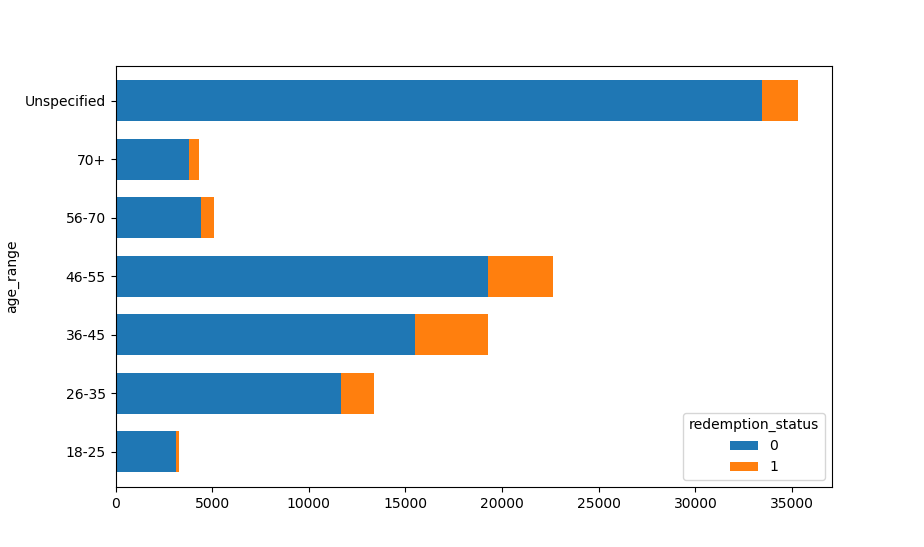

In [18]:
%matplotlib notebook
train_data_merge_EDA.groupby(['age_range','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Out of the age demographic data available, age range of 36 to 55 are mostly redeeming coupons.

In [19]:
'''
2. Is Marital Status as Married are to redeem coupon???
'''

e = pd.DataFrame(train_data_merge_EDA.groupby(['marital_status'])['redemption_status'].sum()).reset_index()
e.columns = ['marital_status','tot_redeem']
e['percent'] = round(e['tot_redeem']/(e['tot_redeem'].sum())*100,2)
display (e)

,marital_status,tot_redeem,percent
0,Married,5366,44.32
1,Single,1854,15.31
2,Unspecified,4888,40.37


<IPython.core.display.Javascript object>


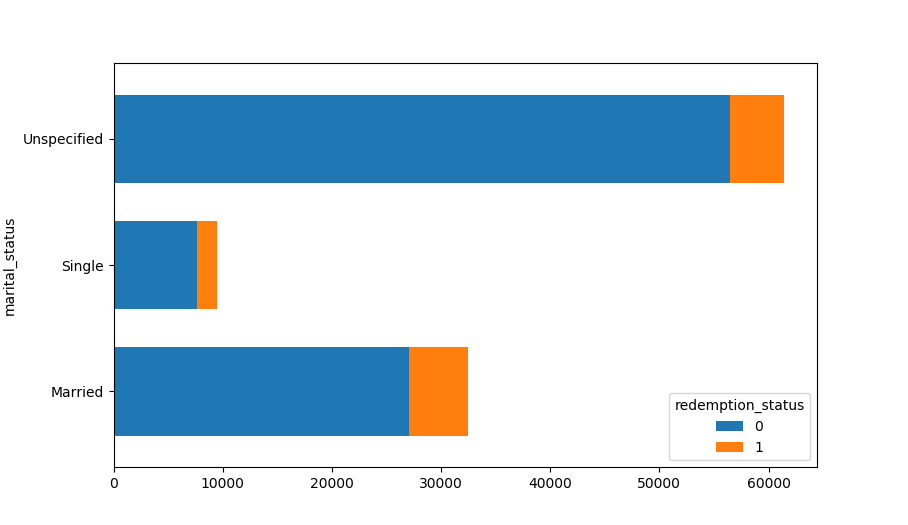

In [20]:
%matplotlib notebook
train_data_merge_EDA.groupby(['marital_status','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : As most of the customers haven't mentioned their marital status it is difficult to support that Married customer redeem more. But basis available data, we could see Married people are mostly using coupons to redeem. So at this stage I could think of giving more weightage to a person which has discloses marital status as Married.

In [21]:
'''
3. Is couple (family size of 2) are using coupons mostly???
'''

f = pd.DataFrame(train_data_merge_EDA.groupby(['family_size'])['redemption_status'].sum()).reset_index()
f.columns = ['family_size','tot_redeem']
f['percent'] = round(f['tot_redeem']/(f['tot_redeem'].sum())*100,2)
display (f)

,family_size,tot_redeem,percent
0,1,2725,22.51
1,2,4213,34.80
2,3,1184,9.78
3,4,1290,10.65
4,5+,870,7.19
5,Unspecified,1826,15.08


<IPython.core.display.Javascript object>


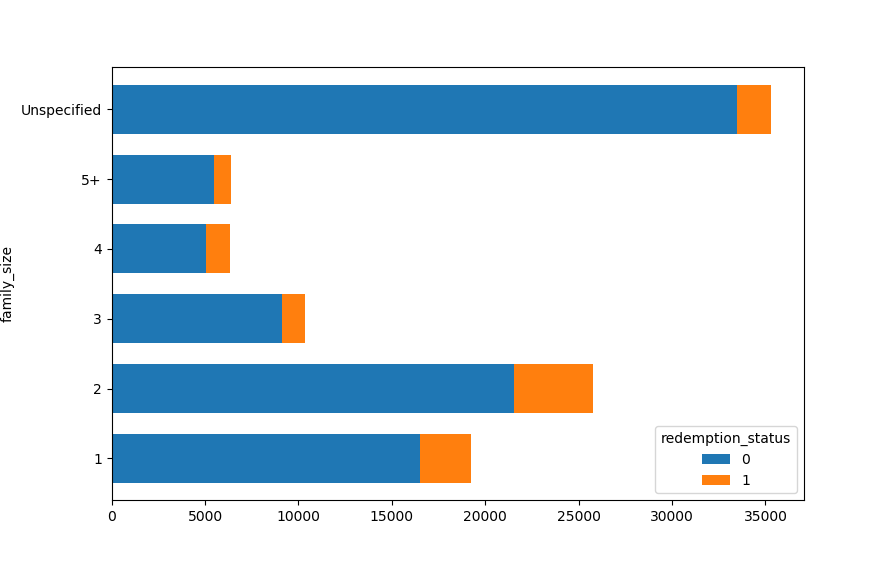

In [22]:
%matplotlib notebook
train_data_merge_EDA.groupby(['family_size','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Considering family size of 2 or more as a married couple (and transforming that ratio on to Marital Status data of Unspecified), then we could make an assumption over here that Married couple are mostly using the coupons to redeem.

In [23]:
'''
4. Is people not on rent are mostly using coupons???
'''

g = pd.DataFrame(train_data_merge_EDA.groupby(['rented'])['redemption_status'].sum()).reset_index()
g.columns = ['rented','tot_redeem']
g['percent'] = round(g['tot_redeem']/(g['tot_redeem'].sum())*100,2)
display (g)

,rented,tot_redeem,percent
0,0,10075,83.21
1,1,207,1.71
2,Unspecified,1826,15.08


<IPython.core.display.Javascript object>


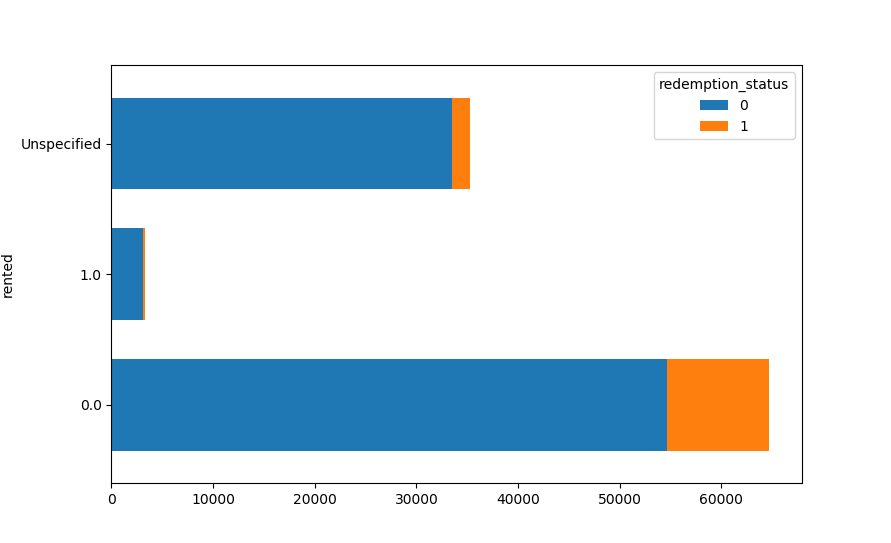

In [24]:
%matplotlib notebook
train_data_merge_EDA.groupby(['rented','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Maximum people have provided status as not rented so we could assume here more weightage to such customers as they have shown greater tendency towards redemption of the coupons.

In [25]:
'''
5. Is no_of_children irrelevant to redeem coupon???
'''

h = pd.DataFrame(train_data_merge_EDA.groupby(['no_of_children'])['redemption_status'].sum()).reset_index()
h.columns = ['no_of_children','tot_redeem']
h['percent'] = round(h['tot_redeem']/(h['tot_redeem'].sum())*100,2)
display (h)

,no_of_children,tot_redeem,percent
0,1,1819,15.02
1,2,1223,10.10
2,3+,965,7.97
3,Unspecified,8101,66.91


<IPython.core.display.Javascript object>


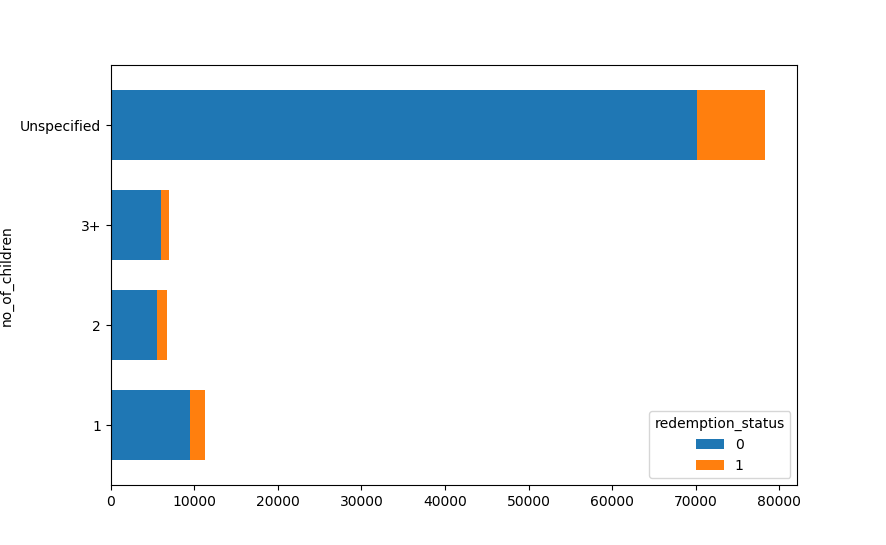

In [26]:
%matplotlib notebook
train_data_merge_EDA.groupby(['no_of_children','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Since most of the customers preferred not to disclose on number of children, at this point we can assume that this field has no significance with redemption of coupons.

In [27]:
'''
6. Is income bracket of 5 are using coupons mostly???
'''

j = pd.DataFrame(train_data_merge_EDA.groupby(['income_bracket'])['redemption_status'].sum()).reset_index()
j.columns = ['income_bracket','tot_redeem']
j['percent'] = round(j['tot_redeem']/(j['tot_redeem'].sum())*100,2)
display (j)

,income_bracket,tot_redeem,percent
0,1,589,4.86
1,2,392,3.24
2,3,300,2.48
3,4,1279,10.56
4,5,4939,40.79
5,6,1577,13.02
6,7,356,2.94
7,8,190,1.57
8,9,619,5.11
9,10,41,0.34


<IPython.core.display.Javascript object>


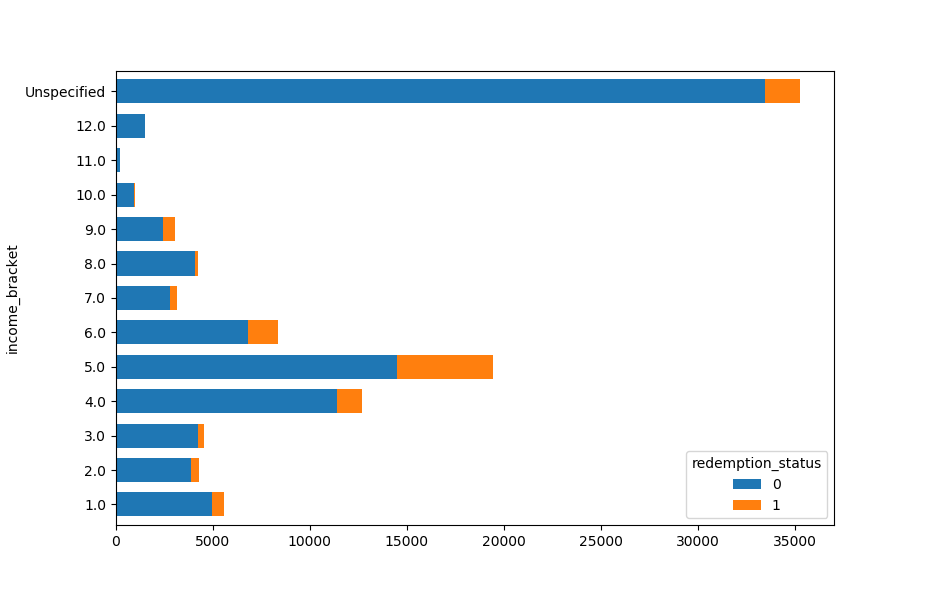

In [28]:
%matplotlib notebook
train_data_merge_EDA.groupby(['income_bracket','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Assuming 5 as mid income group, customers in this group clearly shows behaviour towards redemption of coupon.

# Let's explore from Coupon's perspective, in terms of most redeemed and attributes associated with coupons

In [29]:
'''
Coupon ids getting redeemed very often and attributes associated with it
'''

k = pd.DataFrame(a.groupby('coupon_id')['redemption_status'].sum()).reset_index()
k.columns = ['coupon_id','redeem_count']
k.sort_values(by='redeem_count',ascending=False,inplace=True)
print ('Top 5 Coupon ids redeemed')
display (k.head())

Top 5 Coupon ids redeemed


,coupon_id,redeem_count
6,21,2009
0,6,1593
7,22,1383
2,9,936
1,8,532


In [30]:
l1 = pd.DataFrame(train_data_merge_EDA[(train_data_merge_EDA['coupon_id']==21)|(train_data_merge_EDA['coupon_id']==6)|(train_data_merge_EDA['coupon_id']==22)|(train_data_merge_EDA['coupon_id']==9)|(train_data_merge_EDA['coupon_id']==8)][['coupon_id','item_id','brand','brand_type','category']])
l1.drop_duplicates(subset=['coupon_id','item_id'], keep='first', inplace=True)

In [31]:
l2 = pd.DataFrame(l1.groupby(['brand'])['brand'].count())
l2.columns = ['tot_brand_cnt']
l2['percent'] = round(l2['tot_brand_cnt']/(l2['tot_brand_cnt'].sum())*100,2)
l2.sort_values(by='tot_brand_cnt',ascending=False,inplace=True)
display (l2.head(10))

,tot_brand_cnt,percent
brand,,
56,1688,22.73
133,332,4.47
1337,187,2.52
544,182,2.45
681,162,2.18
209,161,2.17
278,152,2.05
147,145,1.95
1558,131,1.76


In [32]:
l3 = pd.DataFrame(l1.groupby(['brand_type'])['brand_type'].count())
l3.columns = ['tot_brand_type_cnt']
l3['percent'] = round(l3['tot_brand_type_cnt']/(l3['tot_brand_type_cnt'].sum())*100,2)
l3.sort_values(by='tot_brand_type_cnt',ascending=False,inplace=True)
display (l3)

,tot_brand_type_cnt,percent
brand_type,,
Established,5728,77.14
Local,1697,22.86


In [33]:
l4 = pd.DataFrame(l1.groupby(['category'])['category'].count())
l4.columns = ['tot_category_cnt']
l4['percent'] = round(l4['tot_category_cnt']/(l4['tot_category_cnt'].sum())*100,2)
l4.sort_values(by='tot_category_cnt',ascending=False,inplace=True)
display (l4)

,tot_category_cnt,percent
category,,
Grocery,5615,75.62
Packaged Meat,857,11.54
Meat,533,7.18
"Dairy, Juices & Snacks",213,2.87
Seafood,193,2.60
Bakery,7,0.09
Prepared Food,3,0.04
Miscellaneous,2,0.03
Natural Products,2,0.03


Basis visualization for top 5 coupons redeemed, we could look for trend towards
1. brand 56 is the top selling, let's verify if specific brand shows tendency towards coupon redemption???

2. Verify brand type shows tendency towards coupon redemption???

3. Verify category shows tendency towards coupon redemption???

4. Verify campaign type shows tendency towards coupon redemption???


In [34]:
'''
1. verify if specific brand shows tendency towards coupon redemption???
'''
m = pd.DataFrame(l1[(l1['brand']==56)|(l1['brand']==133)|(l1['brand']==1337)|(l1['brand']==544)|(l1['brand']==681)][['brand','brand_type','category']])
m.drop_duplicates(subset=['brand','brand_type','category'], keep='first', inplace=True)
display(m)

,brand,brand_type,category
38,56,Local,Packaged Meat
117,56,Local,Meat
211,133,Established,Grocery
214,56,Local,Grocery
367,544,Established,Grocery
482,1337,Established,Grocery
485,681,Established,Grocery
2925,56,Local,Natural Products
4870,56,Local,Seafood
4891,56,Local,"Dairy, Juices & Snacks"


Inference: For brand 56, there is a wide range of category available under the umbrella of Food products and displays greater tendency towards coupon redemption as well. Even rest other top 4 brands as well belong to general food product category under Grocery.

In [35]:
'''
2. Verify brand type shows tendency towards coupon redemption???
'''

m1 = pd.DataFrame(train_data_merge_EDA.groupby(['brand_type'])['redemption_status'].sum()).reset_index()
m1.columns = ['brand_type','tot_redeem']
m1['percent'] = round(m1['tot_redeem']/(m1['tot_redeem'].sum())*100,2)
display (m1)

,brand_type,tot_redeem,percent
0,Established,9972,82.36
1,Local,2136,17.64


<IPython.core.display.Javascript object>


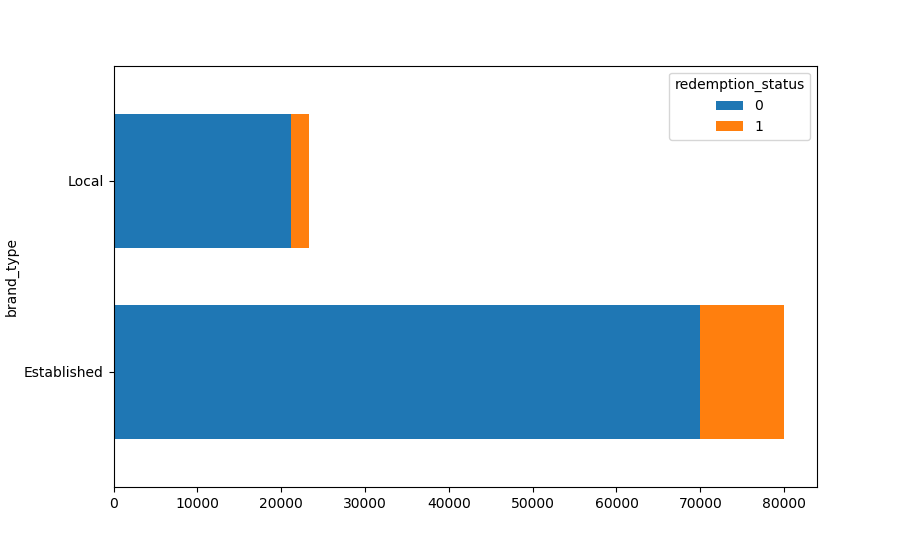

In [36]:
%matplotlib notebook
train_data_merge_EDA.groupby(['brand_type','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference: Coupon redemption percentage seems high when associated with an Established brand type.

In [37]:
'''
3. Verify category shows tendency towards coupon redemption???
'''

m2 = pd.DataFrame(train_data_merge_EDA.groupby(['category'])['redemption_status'].sum()).reset_index()
m2.columns = ['category','tot_redeem']
m2['percent'] = round(m2['tot_redeem']/(m2['tot_redeem'].sum())*100,2)
m2.sort_values(by='tot_redeem',ascending=False,inplace=True)
display (m2)

,category,tot_redeem,percent
4,Grocery,9715,80.24
8,Packaged Meat,856,7.07
9,Pharmaceutical,700,5.78
7,Natural Products,253,2.09
1,"Dairy, Juices & Snacks",208,1.72
5,Meat,190,1.57
12,Seafood,157,1.30
10,Prepared Food,11,0.09
2,Flowers & Plants,6,0.05
0,Bakery,5,0.04


<IPython.core.display.Javascript object>


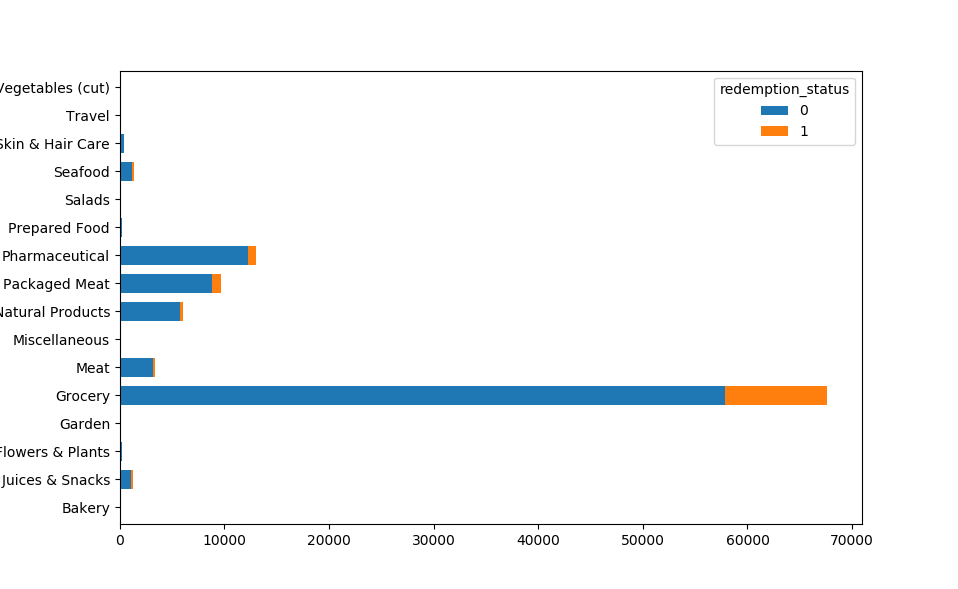

In [38]:
%matplotlib notebook
train_data_merge_EDA.groupby(['category','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Grocery, Packaged Meat, Pharmaceutical, Natural Prodcut, Dairy & Juice and Meat are the category seems more associated with coupon redemption.

In [39]:
'''
4. Verify campaign type shows tendency towards coupon redemption???
'''

m3 = pd.DataFrame(train_data_merge_EDA.groupby(['campaign_type'])['redemption_status'].sum()).reset_index()
m3.columns = ['campaign_type','tot_redeem']
m3['percent'] = round(m3['tot_redeem']/(m3['tot_redeem'].sum())*100,2)
display (m3)

,campaign_type,tot_redeem,percent
0,X,11488,94.88
1,Y,620,5.12


<IPython.core.display.Javascript object>


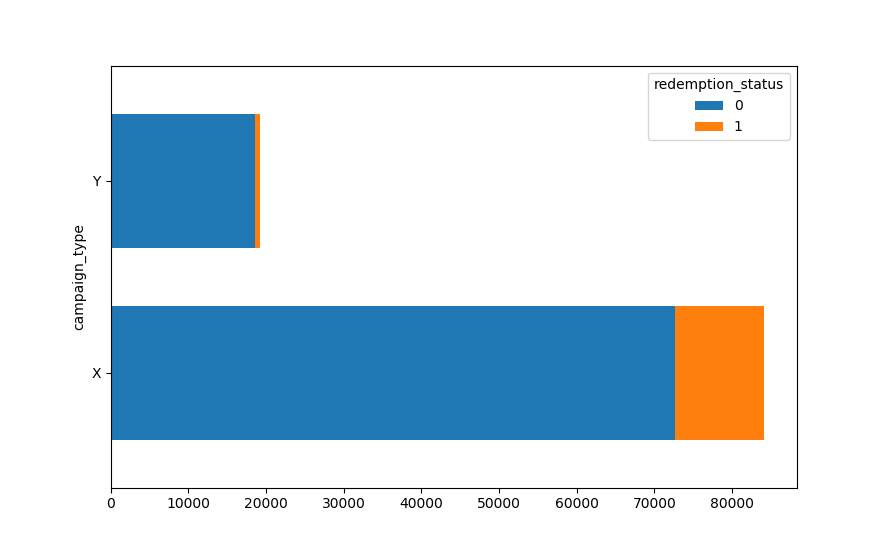

In [40]:
%matplotlib notebook
train_data_merge_EDA.groupby(['campaign_type','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Campaign type of X seems to have more associated with coupon redemption.

# Let's explore coupon redemption trend basis campaign start date and transaction date

In [41]:
n = pd.DataFrame(train_data_merge_EDA.groupby(['start_date_q','end_date_q'])['redemption_status'].sum()).reset_index()
n.columns = ['start_date_q','end_date_q','tot_redeem']
n['percent'] = round(n['tot_redeem']/(n['tot_redeem'].sum())*100,2)
n.sort_values(by='tot_redeem',ascending=False,inplace=True)
display (n)

,start_date_q,end_date_q,tot_redeem,percent
3,Q2-13,Q3-13,6819,56.32
1,Q1-13,Q2-13,4204,34.72
4,Q3-12,Q3-12,355,2.93
6,Q4-12,Q1-13,304,2.51
2,Q2-13,Q2-13,189,1.56
0,Q1-13,Q1-13,155,1.28
7,Q4-12,Q4-12,73,0.60
5,Q3-12,Q4-12,9,0.07


<IPython.core.display.Javascript object>


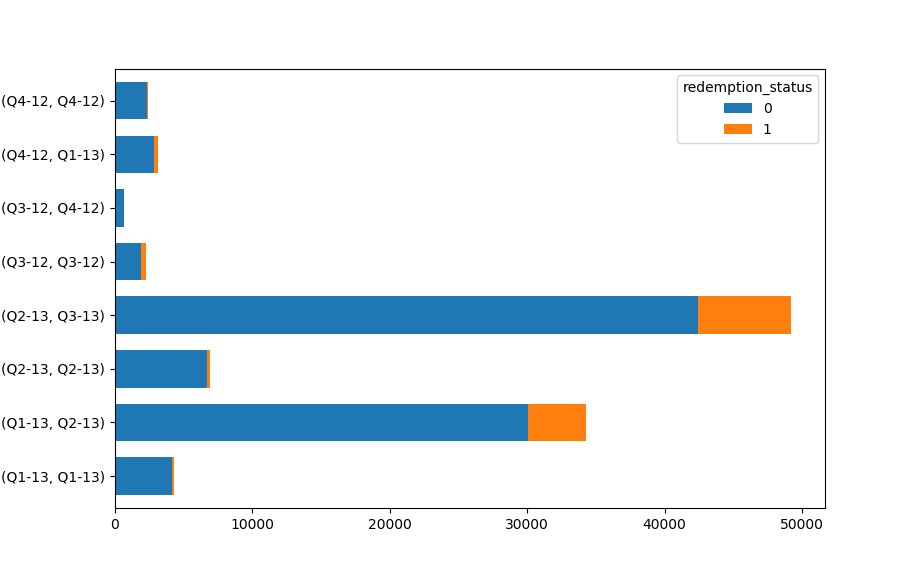

In [42]:
%matplotlib notebook
train_data_merge_EDA.groupby(['start_date_q','end_date_q','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

Inference : Campaign started between Q2-13 to Q3-13 foolwed by Q1-13 to Q2-13, seems experience more association towards coupon redemption trend. So we could assume over here campaign spanned across early quarters of year seem to more association with coupon redemption.

In [43]:
n1 = pd.DataFrame(train_data_merge_EDA.groupby(['tran_date_q'])['redemption_status'].sum()).reset_index()
n1.columns = ['tran_date_q','tot_redeem']
n1['percent'] = round(n1['tot_redeem']/(n1['tot_redeem'].sum())*100,2)
n1.sort_values(by='tot_redeem',ascending=False,inplace=True)
display (n1)

,tran_date_q,tot_redeem,percent
3,Q2-13,2455,20.28
6,Q4-12,2379,19.65
1,Q1-13,2270,18.75
4,Q3-12,2235,18.46
2,Q2-12,1872,15.46
0,Q1-12,823,6.80
5,Q3-13,74,0.61


Inference : We could not clearly see association between transaction quarter and coupon redemption behaviour.

# Basis EDA, we could assume below fields to be more associated towards coupon redemption tendency
- Age range of 36-55
- Married couple (mostly with family size of just 2)
- Income bracket of 5
- Brand 56 covering wide variety of Category under a large umbrella of Food and Beverages
- Brand Type of Established
- Category sapnning mostly across Grocery, Packaged Meat, Pharmaceutical, Natural Prodcut, Dairy & Juice and Meat
- Coupons associated with Campaign Type X seem to be redeemed more in terms of percentage
- Campaign start and end date spanned across early quarters of year seem to more association with coupon redemption

['campaign_id', 'coupon_id', 'customer_id', 'item_id', 'tot_coupon_disc', 'tot_sell_price', 'age_range', 'family_size', 'income_bracket', 'brand']